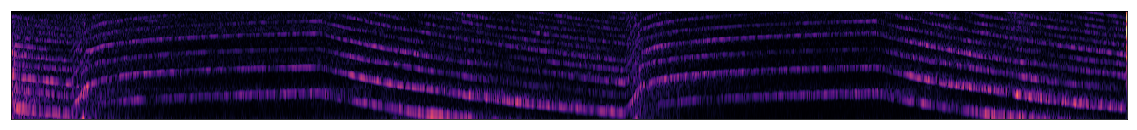

In [12]:
import matplotlib
import librosa
from librosa.display import specshow
from matplotlib import pyplot as plt
%matplotlib inline

wav_path = "/beegfs/vl1019/SONYC-pcen/for_vincent/siren - 0123f2e8f2a6de6d91721b4efa02411d.wav"

# Define PCEN settings.
settings = {
    "fmin": 2000,
    "fmax": 11025,
    "hop_length": 32,
    "n_fft": 1024,
    "n_mels": 128,
    "sr": 22050,
    "win_length": 256,
    "window": "flattop",
    "T": 1.0,
    "alpha": 0.8,
    "delta": 10.0,
    "r": 0.25,
    "eps": 1e-6}

# Load WAV file.
waveform, sample_rate = librosa.load(wav_path, sr=None)

# Resample and map to appropriate amplitude range.
waveform = librosa.resample(
    waveform, sample_rate, settings["sr"])
waveform = waveform * (2**31)

# Compute short-term Fourier transform (STFT)
stft = librosa.stft(
    waveform,
    n_fft=settings["n_fft"],
    win_length=settings["win_length"],
    hop_length=settings["hop_length"],
    window=settings["window"])

# Compute the squared complex modulus ("abs2") of the STFT.
abs2_stft = (stft.real*stft.real) + (stft.imag*stft.imag)

# Transform the STFT into a mel-frequency spectrogram.
E = librosa.feature.melspectrogram(
    y=None,
    S=abs2_stft,
    sr=settings["sr"],
    n_fft=settings["n_fft"],
    n_mels=settings["n_mels"],
    htk=True,
    fmin=settings["fmin"],
    fmax=settings["fmax"])

# Apply per-channel energy normalization (PCEN).
PCEN = librosa.pcen(
    S=E,
    time_constant=settings["T"],
    sr=settings["sr"],
    hop_length=settings["hop_length"],
    gain=settings["alpha"],
    power=settings["r"],
    bias=settings["delta"],
    eps=settings["eps"])

# Display
plt.figure(figsize=(20,2))
specshow(PCEN)
